#### - Sobhan Moradian Daghigh
#### 
#### - 1/18/2022
#### 
#### - PR - EX03 - Q5 - All Parts

In [77]:
import pandas as pd
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA

In [3]:
dataset = pd.read_csv('./inputs/P5/digits.csv')
dataset.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

### Part A.

In [34]:
pca = PCA(n_components=15)
trans = pca.fit_transform(dataset)
pca_eigenvecs = pd.DataFrame(pca.components_)
pca_eigenvecs.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,8.370604e-19,-0.017309,-0.223429,-0.135913,-0.033032,-0.096634,-0.008329,0.002269,-0.000321,-0.119309,...,-0.063288,0.000962,0.000010,-0.014079,-0.235675,-0.141226,-0.009160,-0.089418,-0.036598,-0.011469
1,1.277721e-17,-0.010106,-0.049085,-0.009433,-0.053602,-0.117755,-0.062128,-0.007936,-0.000163,-0.021017,...,0.148776,0.000542,-0.000033,-0.010079,-0.070272,0.017111,0.194296,0.176697,0.019455,-0.006697
2,2.787554e-17,0.018342,0.126476,0.132155,-0.134016,-0.264939,-0.116644,-0.016842,0.000394,0.079437,...,0.222787,0.021862,-0.000014,0.017583,0.123158,0.098353,0.138485,0.232084,0.167026,0.034804
3,-3.829027e-17,0.020013,0.177427,0.195680,0.032089,0.095135,0.071835,0.009206,0.000060,0.074879,...,-0.139553,-0.015998,-0.000012,0.021007,0.203252,0.208232,-0.224549,-0.307660,-0.099388,-0.024473
4,9.739920e-17,0.014079,0.082823,-0.065599,-0.015393,0.166985,0.094896,0.004396,0.000097,0.052311,...,-0.017676,0.007181,-0.000094,0.012460,0.070898,0.022151,0.050568,-0.035616,-0.015936,0.022433


In [32]:
pca_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
dtypes: float64(15)
memory usage: 210.7 KB


### Part B.

In [66]:
params = {"bandwidth": np.arange(1.1, 10, 0.1)}
grid = GridSearchCV(KernelDensity(), params)
pca_dataset = pd.DataFrame(trans)
grid.fit(pca_dataset)
print("bandwidth: {:.2f}".format(grid.best_estimator_.bandwidth))

bandwidth: 3.50


### Part C.

In [102]:
kde = KernelDensity(bandwidth=3.5)
kde.fit(pca_dataset)

samples = kde.sample(n_samples=20, random_state=0)
samples = pca.inverse_transform(samples)

samples = samples.reshape(20, 8, 8)
samples.shape

(20, 8, 8)

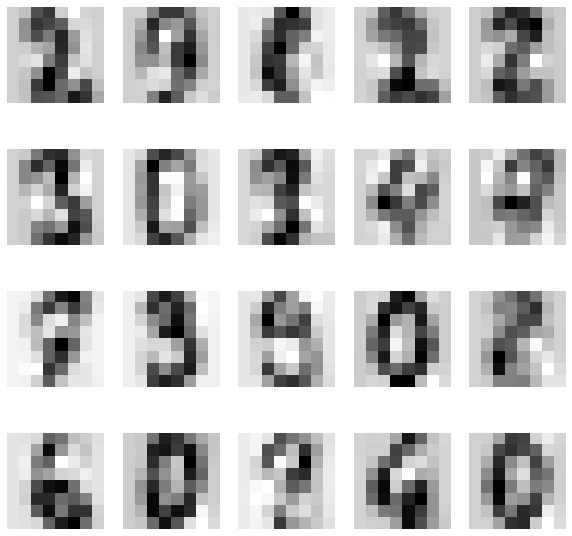

In [103]:
fig, ax = plt.subplots(4, 5, figsize=(10, 10))
[axi.set_axis_off() for axi in ax.ravel()]

for i, ax in enumerate(fig.axes):
    ax.imshow(samples[i], cmap=plt.cm.binary)

### Part D.

In [104]:
params = {"bandwidth": np.arange(1.1, 10, 0.1)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(dataset)
print("bandwidth: {:.2f}".format(grid.best_estimator_.bandwidth))

bandwidth: 1.70


In [105]:
kde = KernelDensity(bandwidth=1.7)
kde.fit(pca_dataset)

samples = kde.sample(n_samples=20, random_state=0)
samples = pca.inverse_transform(samples)

samples = samples.reshape(20, 8, 8)
samples.shape

(20, 8, 8)

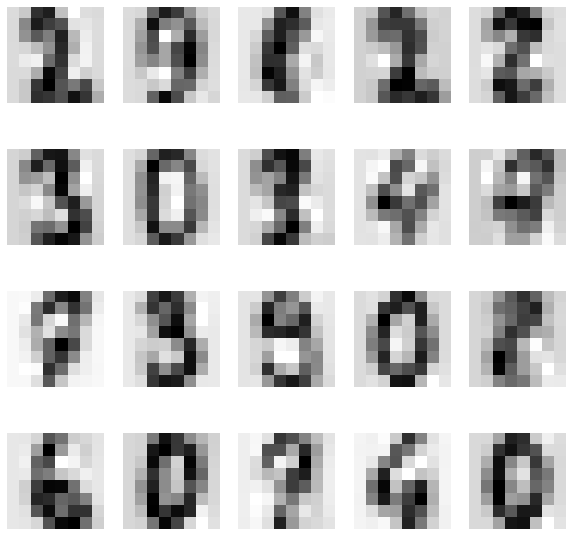

In [106]:
fig, ax = plt.subplots(4, 5, figsize=(10, 10))
[axi.set_axis_off() for axi in ax.ravel()]

for i, ax in enumerate(fig.axes):
    ax.imshow(samples[i], cmap=plt.cm.binary)

#### FINITO